# Linear Regression

### 1. Gather Data

In [9]:
import pandas as pd


# Path to your CSV file
csv_file = '../../data/test_sample.csv'
csv_file_bow = '../../data/bow_features.csv'
# Read CSV into a DataFrame
df = pd.read_csv(csv_file)
df

df_bow= pd.read_csv(csv_file_bow)
df_bow

,310,absolutely,acceptable,ad,alright,amaze,amazing,another,app,arrival,...,wait,waste,way,within,work,worse,worth,would,wrong,www
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Convert labels to numeric scores

In [ ]:
# Convert label to sentiment score
def label_to_score(label):
    if label == 'positive':
        return 1
    elif label == 'neutral':
        return 0
    elif label == 'negative':
        return -1
    else:
        return 0  

df['sentiment_score'] = df['label'].apply(label_to_score)
df


### 3.Feature Extraction from Text

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['lemmatized'])  # or 'tokenized'
y = df['sentiment_score']

### 4.Apply Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0009416581978901944


### 5. Check how good is the model

In [ ]:

from sklearn.metrics import r2_score, accuracy_score
import numpy as np

# If your predictions are stored in `predictions`
# and your test labels are in `y_test`
print("R2 Score:", r2_score(y_test, y_pred))

# If using sentiment as classes (-1, 0, 1)
rounded_preds = np.round(y_pred)
print("Accuracy:", accuracy_score(y_test, rounded_preds))


### 6. Plot actual vs. predicted

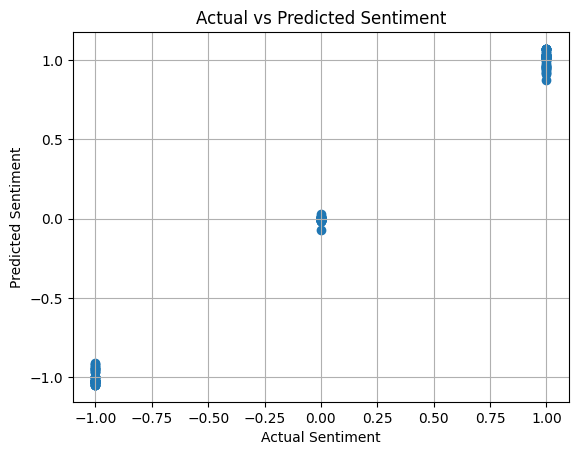

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sentiment")
plt.ylabel("Predicted Sentiment")
plt.title("Actual vs Predicted Sentiment")
plt.grid(True)
plt.show()
